In [1]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv to twitter_training.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re


In [10]:
df = pd.read_csv('twitter_training.csv', header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
# Rename columns
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']

# Keep only the Tweet and Sentiment columns
df = df[['Tweet', 'Sentiment']]

# Drop missing/null values
df.dropna(inplace=True)

# Preview cleaned data
df.head()

/tmp/ipython-input-11-318493604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Tweet,Sentiment
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


/tmp/ipython-input-12-3691521944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


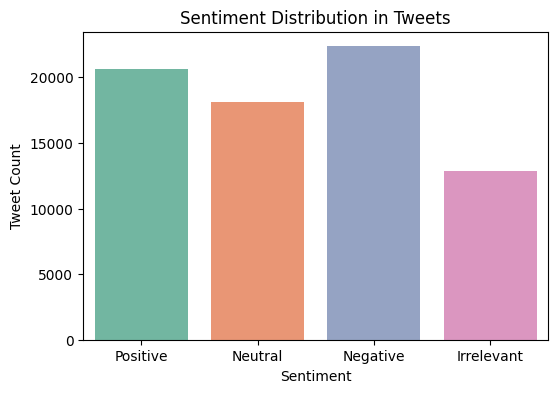

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


In [14]:
# Function to clean tweet text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply cleaning function
df['clean_tweet'] = df['Tweet'].apply(clean_text)

# Preview cleaned tweet column
df[['Tweet', 'clean_tweet']].head()


,Tweet,clean_tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


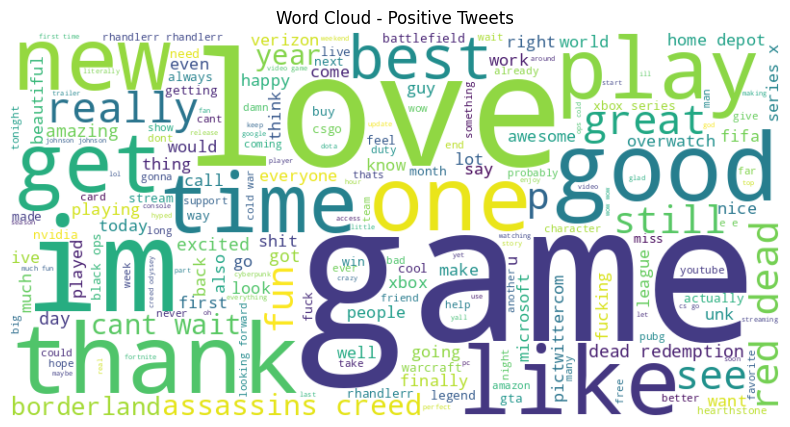

In [17]:
positive_tweets = df[df['Sentiment'] == 'Positive']['clean_tweet'].str.cat(sep=' ')
wordcloud_pos = WordCloud(width=800, height=400, background_color='white',
                          stopwords=set(stopwords.words('english'))).generate(positive_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Tweets')
plt.show()

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

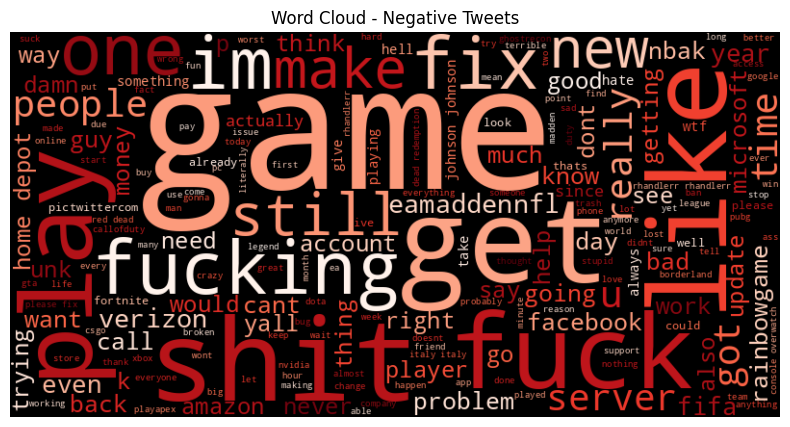

In [18]:
negative_tweets = df[df['Sentiment'] == 'Negative']['clean_tweet'].str.cat(sep=' ')
wordcloud_neg = WordCloud(width=800, height=400, background_color='black',
                          colormap='Reds',
                          stopwords=set(stopwords.words('english'))).generate(negative_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Tweets')
plt.show()
